In [2]:
%reset -f

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
X = pd.read_csv("training_set_VU_DM.csv", index_col=0)
# X_test = pd.read_csv("test_set_VU_DM.csv", index_col=0)

# 1. Business Understanding

Blah blah

# 2. EDA

## Descriptive Statistics


In [6]:
# Print the descriptive statistics for all numeric columns
print(X.describe())

# Print the frequency of each category for all categorical columns
for col in X.select_dtypes(include=['object']):
    print(X[col].value_counts())

            site_id  visitor_location_country_id  visitor_hist_starrating  \
count  4.958347e+06                 4.958347e+06            251866.000000   
mean   9.953133e+00                 1.753405e+02                 3.374334   
std    7.646890e+00                 6.591625e+01                 0.692519   
min    1.000000e+00                 1.000000e+00                 1.410000   
25%    5.000000e+00                 1.000000e+02                 2.920000   
50%    5.000000e+00                 2.190000e+02                 3.450000   
75%    1.400000e+01                 2.190000e+02                 3.930000   
max    3.400000e+01                 2.310000e+02                 5.000000   

       visitor_hist_adr_usd  prop_country_id       prop_id  prop_starrating  \
count         252988.000000     4.958347e+06  4.958347e+06     4.958347e+06   
mean             176.022659     1.739739e+02  7.007918e+04     3.180525e+00   
std              107.254493     6.834525e+01  4.060992e+04     1.0510

## Distribution of Variables

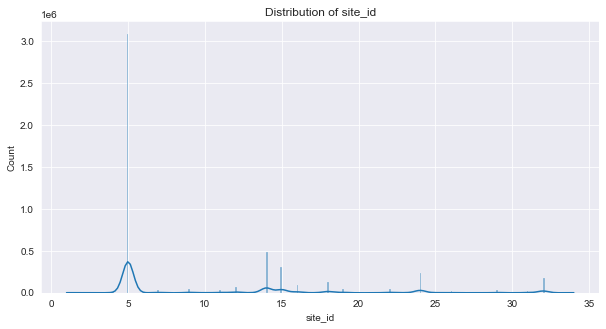

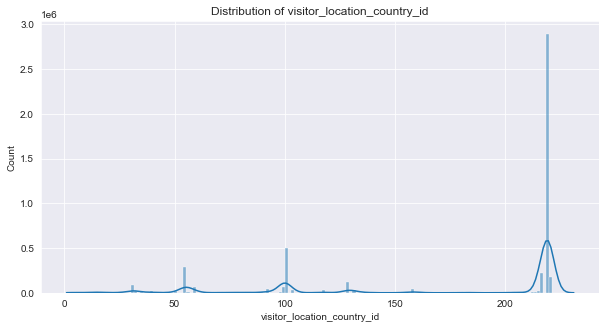

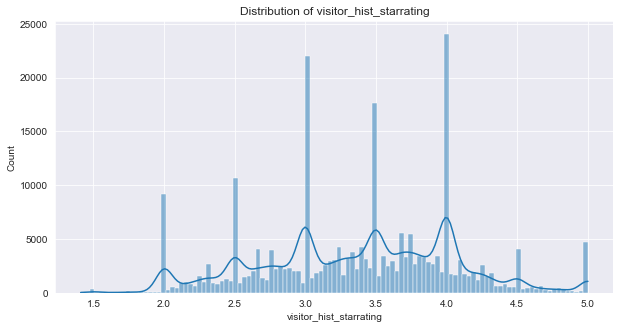

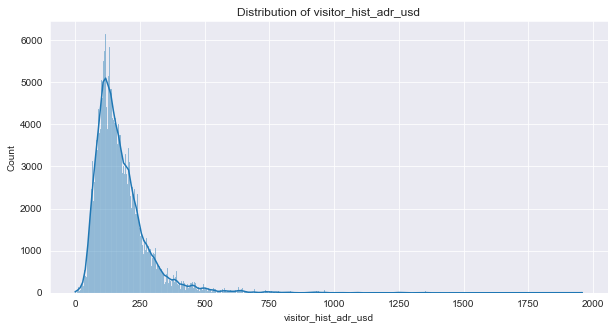

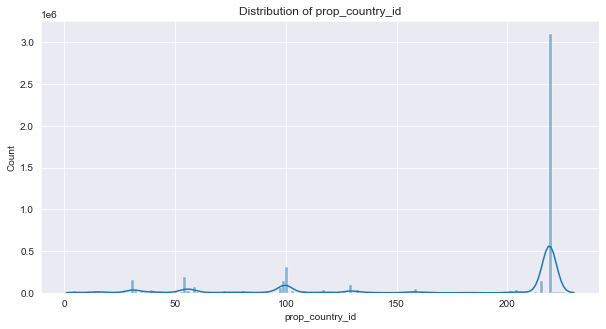

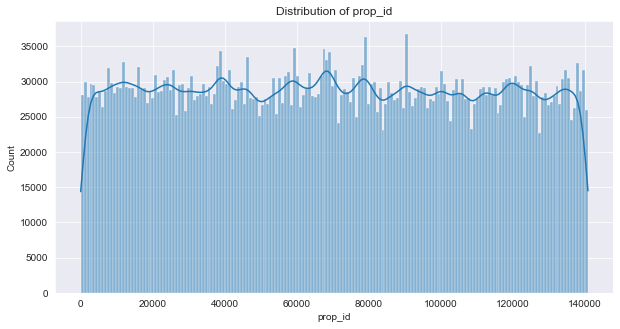

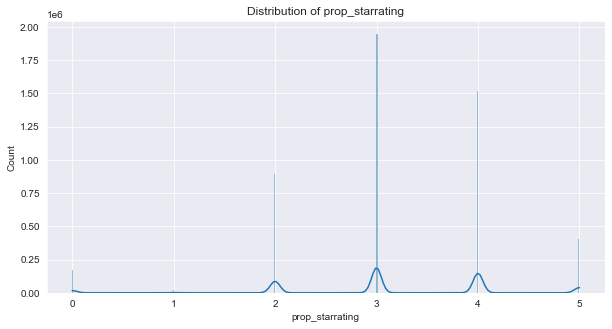

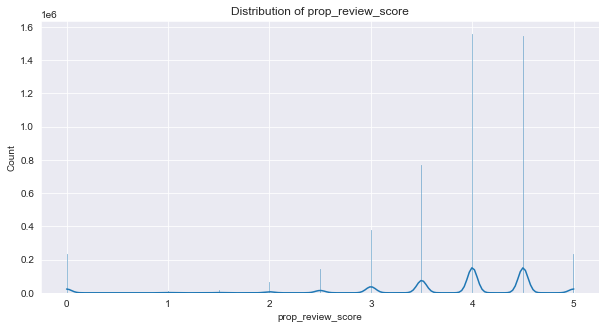

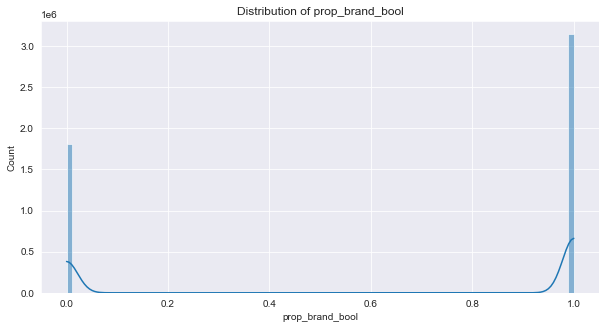

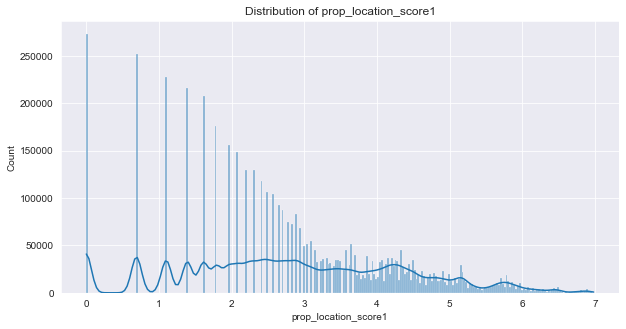

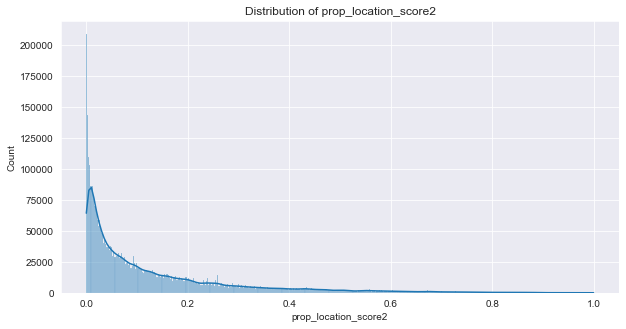

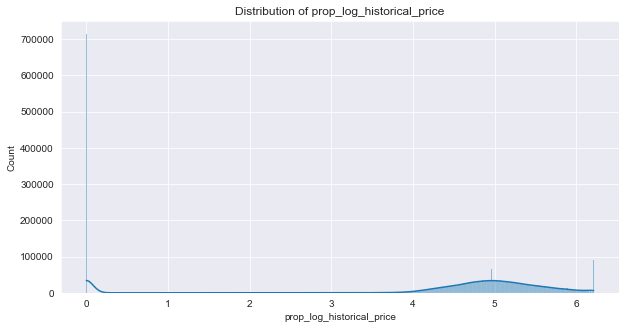

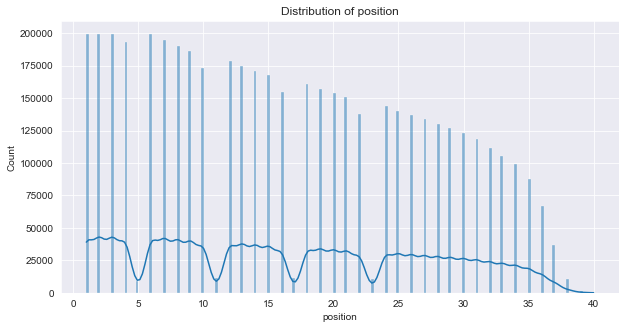

In [ ]:
# For numeric variables
for col in X.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(10, 5))
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# For categorical variables
for col in X.select_dtypes(include=['object']):
    plt.figure(figsize=(10, 5))
    X[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.show()


## Missing Values

In [4]:
# Print the number of missing values in each column
print(X.isnull().sum())

date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance      1607782
random_bool              

## Correlation Analysis

                              site_id  visitor_location_country_id  \
site_id                      1.000000                    -0.305921   
visitor_location_country_id -0.305921                     1.000000   
visitor_hist_starrating      0.309078                    -0.256252   
visitor_hist_adr_usd         0.099104                    -0.073231   
prop_country_id             -0.312593                     0.482787   
prop_id                      0.002943                     0.000432   
prop_starrating              0.174845                    -0.112911   
prop_review_score           -0.071645                     0.064279   
prop_brand_bool             -0.196217                     0.182405   
prop_location_score1         0.178399                    -0.121392   
prop_location_score2         0.056689                    -0.009244   
prop_log_historical_price    0.028635                    -0.021898   
position                    -0.031194                     0.018716   
price_usd           

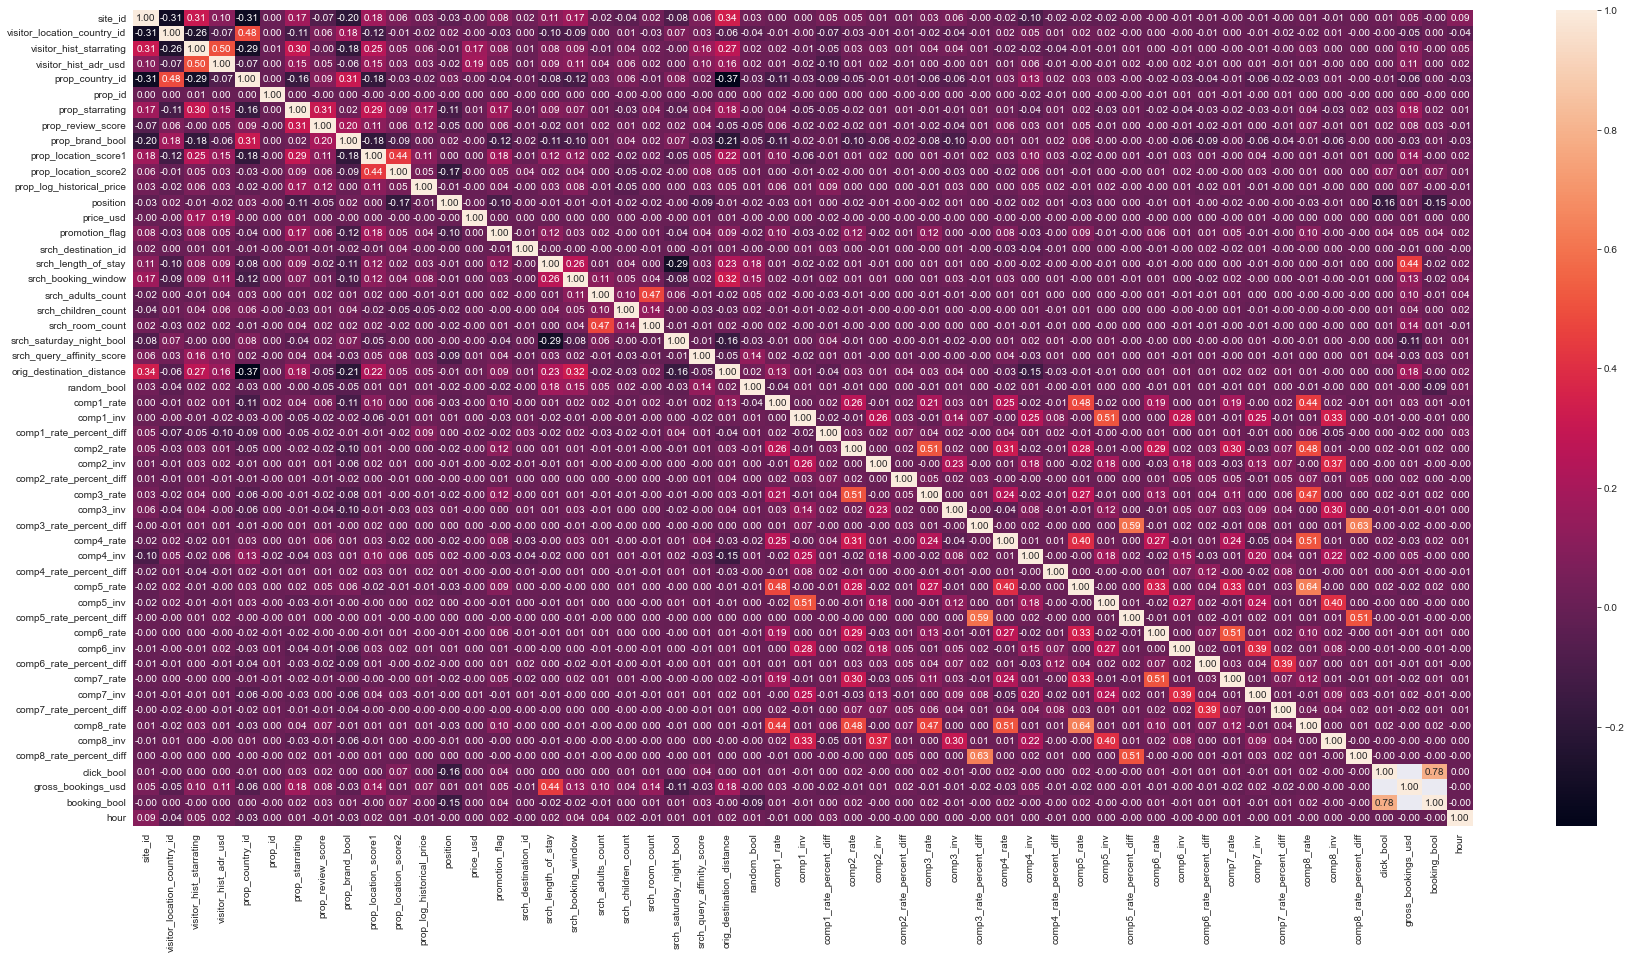

In [16]:
# Print the correlation matrix for numeric columns
corr_matrix = X.corr()
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

## Visualize User Behavior

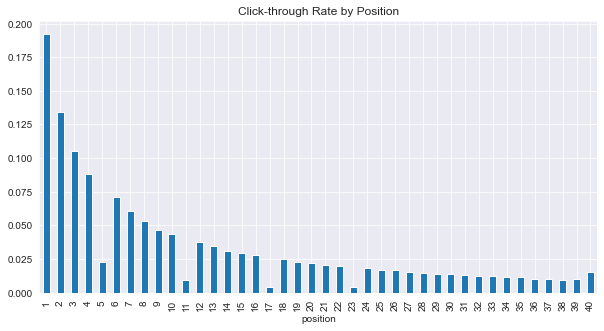

In [11]:
# Example: Click-through rate by position
click_rate_by_position = X.groupby('position')['click_bool'].mean()
plt.figure(figsize=(10, 5))
click_rate_by_position.plot(kind='bar')
plt.title("Click-through Rate by Position")
plt.show()

## Temporal Analysis

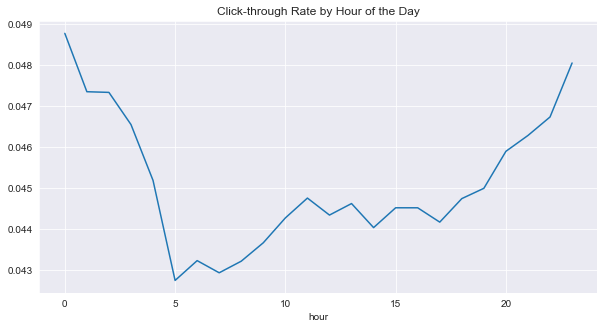

In [12]:
# Assuming 'date_time' is a string, convert it to a datetime object
X['date_time'] = pd.to_datetime(X['date_time'])

# Example: Click-through rate by hour of the day
X['hour'] = X['date_time'].dt.hour
click_rate_by_hour = X.groupby('hour')['click_bool'].mean()
plt.figure(figsize=(10, 5))
click_rate_by_hour.plot(kind='line')
plt.title("Click-through Rate by Hour of the Day")
plt.show()

## Investigate the Target Variable

0    4736468
1     221879
Name: click_bool, dtype: int64


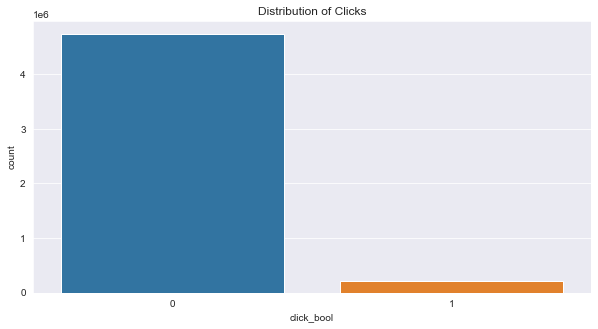

In [13]:
# Print the frequency of each class in the target variable
print(X['click_bool'].value_counts())

# Plot the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.countplot(x='click_bool', data=X)
plt.title("Distribution of Clicks")
# plt.show()

# Data preparation

### Split the data to input and output

In [ ]:
y = X['click_bool']
X = X.drop(['click_bool'], axis = 1)